<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_479_edition_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/ml_intro/blob/main/2_planificacion/redes_neuronales_geron/chapter_10/pagina_479_edition_3.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

Aquí tienes la traducción al español del texto:

---



### El Perceptrón Multicapa y la Retropropagación  



Un **Perceptrón Multicapa (MLP)** está compuesto por una capa de entrada, una o más capas de **Unidades Lineales Umbral (TLU)** llamadas **capas ocultas**, y una capa final de TLUs llamada **capa de salida** (ver Figura 10-7). 

<img src = 'perceptron_multicapa_1.png' width = 500>


**Figura 10-7.** Arquitectura de un perceptrón multicapa con dos entradas, una capa oculta de cuatro neuronas y tres neuronas de salida.  


Las capas cercanas a la entrada suelen llamarse **capas inferiores**, y las cercanas a las salidas, **capas superiores**.  



**NOTA**  
El flujo de la señal solo va en una dirección (de las entradas a las salidas), por lo que esta arquitectura es un ejemplo de una **red neuronal de propagación hacia adelante (FNN)**.  



Cuando una **red neuronal artificial (ANN)** contiene una pila profunda de capas ocultas, se llama **red neuronal profunda (DNN)**. 

El campo del **aprendizaje profundo** estudia las DNNs y, en general, se enfoca en modelos con pilas profundas de cálculos. 

Aun así, muchas personas hablan de aprendizaje profundo cada vez que se mencionan redes neuronales (incluso las superficiales).  



Durante muchos años, los investigadores lucharon por encontrar una forma de entrenar MLPs sin éxito. 

A principios de los 60, varios investigadores discutieron la posibilidad de usar **descenso de gradiente** para entrenar redes neuronales, pero, como vimos en el Capítulo 4, esto requiere calcular los gradientes del error del modelo respecto a sus parámetros. 

En ese entonces no estaba claro cómo hacer esto eficientemente en un modelo tan complejo con tantos parámetros, especialmente con la capacidad computacional de la época.  



En 1970, un investigador llamado **Seppo Linnainmaa** presentó en su tesis de maestría una técnica para calcular todos los gradientes de forma automática y eficiente. 

# Práctica sobre el algoritmo de retropropagación de Linnainmaa  

Aquí tienes un diseño de práctica didáctica en Python y LaTeX para entender el algoritmo de entrenamiento de una MLP (Multi-Layer Perceptron) y el aporte de **Seppo Linnainmaa** sobre la diferenciación automática (*autodiff*).

---



## **Práctica: Entrenamiento de una MLP y Diferenciación Automática**  
**Objetivo**: Implementar una red neuronal simple (MLP) y entender cómo se calculan los gradientes mediante backpropagation (inspirado en el trabajo de Linnainmaa).

---



### **Parte 1: Explicación Teórica (LaTeX)**  
Incluye en un documento LaTeX la siguiente explicación:






$\title{Algoritmo de Entrenamiento de una MLP y Diferenciación Automática}$
$\author{Inspirado en Seppo Linnainmaa (1970)}$
$\date{2 de Julio de 2025}$


$\section{Introducción}$  

En 1970, $\textbf{Seppo Linnainmaa}$ introdujo la idea de calcular gradientes de manera automática mediante la aplicación sistemática de la regla de la cadena, base del algoritmo de $\textit{backpropagation}$.

$\section{MLP y Gradientes}$
Una MLP con una capa oculta calcula su salida como:
$$
y = \sigma(W_2 \cdot \sigma(W_1 \cdot X + b_1) + b_2)
$$
donde:
\begin{itemize}
    \item $W_1, W_2$: Pesos de las capas.
    \item $b_1, b_2$: Sesgos.
    \item $\sigma$: Función de activación (ReLU, sigmoide, etc.).
\end{itemize}



# Backpropagation  



El gradiente de la pérdida ($L$) respecto a $W_1$ se calcula con la regla de la cadena:
$$
\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial h_1} \cdot \frac{\partial h_1}{\partial W_1}
$$  

Linnainmaa propuso calcular estos términos de forma eficiente mediante un grafo computacional.






---

### **Parte 2: Implementación en Python**  
Código paso a paso para entrenar una MLP con `numpy` y visualizar los gradientes:


In [2]:
import numpy as np

# Datos de ejemplo: XOR (problema no lineal)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Arquitectura MLP: 2-2-1
np.random.seed(0)
W1 = np.random.randn(2, 2)  # Capa oculta (2 neuronas)
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)  # Capa de salida (1 neurona)
b2 = np.zeros((1, 1))

# Función de activación (sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide (para backprop)
def sigmoid_derivative(x):
    return x * (1 - x)

# Hiperparámetros
lr = 0.1
epochs = 100_000

# Entrenamiento
for epoch in range(epochs):
    # Forward pass
    h1 = sigmoid(X.dot(W1) + b1)
    y_pred = sigmoid(h1.dot(W2) + b2)
    
    # Pérdida (MSE)
    loss = np.mean((y_pred - y)**2)
    
    # Backpropagation (diferenciación automática)
    grad_y_pred = 2 * (y_pred - y) / y.size
    grad_W2 = h1.T.dot(grad_y_pred * sigmoid_derivative(y_pred))
    grad_b2 = np.sum(grad_y_pred * sigmoid_derivative(y_pred), axis=0)
    
    grad_h1 = (grad_y_pred * sigmoid_derivative(y_pred)).dot(W2.T)
    grad_W1 = X.T.dot(grad_h1 * sigmoid_derivative(h1))
    grad_b1 = np.sum(grad_h1 * sigmoid_derivative(h1), axis=0)
    
    # Actualización de pesos (Descenso de Gradiente)
    W1 -= lr * grad_W1
    b1 -= lr * grad_b1
    W2 -= lr * grad_W2
    b2 -= lr * grad_b2
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Predicción final
print("\nPredicciones:")
print(y_pred)


Epoch 0, Loss: 0.2696
Epoch 1000, Loss: 0.2071
Epoch 2000, Loss: 0.1750
Epoch 3000, Loss: 0.1562
Epoch 4000, Loss: 0.1461
Epoch 5000, Loss: 0.1404
Epoch 6000, Loss: 0.1368
Epoch 7000, Loss: 0.1345
Epoch 8000, Loss: 0.1329
Epoch 9000, Loss: 0.1317
Epoch 10000, Loss: 0.1308
Epoch 11000, Loss: 0.1301
Epoch 12000, Loss: 0.1296
Epoch 13000, Loss: 0.1291
Epoch 14000, Loss: 0.1287
Epoch 15000, Loss: 0.1284
Epoch 16000, Loss: 0.1281
Epoch 17000, Loss: 0.1279
Epoch 18000, Loss: 0.1277
Epoch 19000, Loss: 0.1275
Epoch 20000, Loss: 0.1274
Epoch 21000, Loss: 0.1272
Epoch 22000, Loss: 0.1271
Epoch 23000, Loss: 0.1270
Epoch 24000, Loss: 0.1269
Epoch 25000, Loss: 0.1268
Epoch 26000, Loss: 0.1267
Epoch 27000, Loss: 0.1267
Epoch 28000, Loss: 0.1266
Epoch 29000, Loss: 0.1265
Epoch 30000, Loss: 0.1265
Epoch 31000, Loss: 0.1264
Epoch 32000, Loss: 0.1264
Epoch 33000, Loss: 0.1263
Epoch 34000, Loss: 0.1263
Epoch 35000, Loss: 0.1262
Epoch 36000, Loss: 0.1262
Epoch 37000, Loss: 0.1261
Epoch 38000, Loss: 0.1261



### **Parte 3: Visualización de Gradientes**  
Agrega una gráfica en LaTeX o Python para mostrar cómo evoluciona la pérdida:


Epoch 0, Loss: 0.2696
Epoch 1000, Loss: 0.2071
Epoch 2000, Loss: 0.1750
Epoch 3000, Loss: 0.1562
Epoch 4000, Loss: 0.1461
Epoch 5000, Loss: 0.1404
Epoch 6000, Loss: 0.1368
Epoch 7000, Loss: 0.1345
Epoch 8000, Loss: 0.1329
Epoch 9000, Loss: 0.1317

Predicciones:
[[0.06278111]
 [0.49782865]
 [0.9202718 ]
 [0.51063304]]


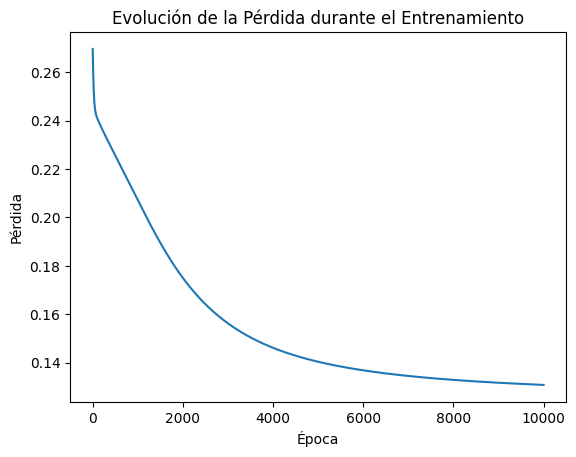

In [5]:


import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: XOR (problema no lineal)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Arquitectura MLP: 2-2-1
np.random.seed(0)
W1 = np.random.randn(2, 2)  # Capa oculta (2 neuronas)
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)  # Capa de salida (1 neurona)
b2 = np.zeros((1, 1))

# Función de activación (sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la sigmoide (para backprop)
def sigmoid_derivative(x):
    return x * (1 - x)

# Hiperparámetros
lr = 0.1
epochs = 10000

# Inicializar lista para guardar la pérdida en cada época
loss_history = []

# Entrenamiento
for epoch in range(epochs):
    # Forward pass
    h1 = sigmoid(X.dot(W1) + b1)
    y_pred = sigmoid(h1.dot(W2) + b2)
    
    # Pérdida (MSE)
    loss = np.mean((y_pred - y)**2)
    loss_history.append(loss)  # <-- Guardar pérdida en cada época
    
    # Backpropagation (diferenciación automática)
    grad_y_pred = 2 * (y_pred - y) / y.size
    grad_W2 = h1.T.dot(grad_y_pred * sigmoid_derivative(y_pred))
    grad_b2 = np.sum(grad_y_pred * sigmoid_derivative(y_pred), axis=0)
    
    grad_h1 = (grad_y_pred * sigmoid_derivative(y_pred)).dot(W2.T)
    grad_W1 = X.T.dot(grad_h1 * sigmoid_derivative(h1))
    grad_b1 = np.sum(grad_h1 * sigmoid_derivative(h1), axis=0)
    
    # Actualización de pesos (Descenso de Gradiente)
    W1 -= lr * grad_W1
    b1 -= lr * grad_b1
    W2 -= lr * grad_W2
    b2 -= lr * grad_b2
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Predicción final
print("\nPredicciones:")
print(y_pred)

# Gráfica de la pérdida
plt.plot(loss_history)
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.title("Evolución de la Pérdida durante el Entrenamiento")
plt.savefig(r"C:\Users\marco\Downloads\loss_plot.png")
plt.show()



---

### **Conclusiones**  
1. Linnainmaa sentó las bases para el cálculo eficiente de gradientes en redes neuronales.  
2. Backpropagation es una aplicación de la regla de la cadena sobre el grafo computacional.  
3. La diferenciación automática (*autodiff*) es clave en el entrenamiento de MLPs modernas.  



**¡Practica modificando la arquitectura o la función de pérdida!**  


Este algoritmo se conoce hoy como **diferenciación automática en modo inverso** (o **autodiff inverso**). 

En solo dos pasadas por la red (una hacia adelante y otra hacia atrás), puede calcular los gradientes del error de la red neuronal respecto a cada parámetro del modelo. 

Es decir, determina cómo ajustar cada peso de conexión y cada sesgo para reducir el error.

 Estos gradientes se usan luego para realizar un paso de descenso de gradiente. 

Si se repite este proceso (calcular gradientes automáticamente y ajustar con descenso de gradiente), el error de la red neuronal disminuirá gradualmente hasta alcanzar un mínimo. 

Esta combinación de autodiff inverso y descenso de gradiente se llama **retropropagación** (o **backprop**). 

 

**NOTA**  
Existen varias técnicas de autodiff, cada una con pros y contras. 

El autodiff inverso es ideal cuando la función a diferenciar tiene muchas variables (pesos y sesgos) y pocas salidas (una pérdida).  



La retropropagación puede aplicarse a todo tipo de grafos computacionales, no solo a redes neuronales: la tesis de Linnainmaa no trataba específicamente de redes neuronales, sino de un concepto más general. 

Pasaron varios años antes de que la retropropagación se usara ampliamente en redes neuronales.  



En 1985, **David Rumelhart, Geoffrey Hinton y Ronald Williams** publicaron un artículo revolucionario que analizaba cómo la retropropagación permitía a las redes neuronales aprender representaciones internas útiles. 

<img src = 'https://aiws.net/wp-content/uploads/sites/18/2024/10/Picture6.png'>

Sus resultados fueron tan impactantes que la retropropagación se popularizó rápidamente. 

Hoy es, por mucho, la técnica de entrenamiento más usada en redes neuronales.  



# Funcionamiento detallado de la retropropagación:  


1. **Mini-lotes**: Procesa un mini-lote a la vez (ej. 32 instancias) y recorre el conjunto de entrenamiento múltiples veces. Cada pasada se llama **época**.  


2. **Pasada hacia adelante**: El mini-lote entra por la capa de entrada, y se calcula la salida de cada neurona en las capas ocultas, preservando todos los resultados intermedios para la pasada hacia atrás. 

 
3. **Cálculo del error**: Se mide el error de salida usando una **función de pérdida** que compara la salida deseada con la real.  


4. **Pasada hacia atrás**: Usando la **regla de la cadena**, el algoritmo calcula cuánto contribuyó cada peso y sesgo al error, propagando el gradiente del error desde la salida hasta la entrada. 

 
5. **Ajuste de pesos**: Finalmente, se realiza un paso de descenso de gradiente para ajustar los pesos y reducir el error.  



# **ADVERTENCIA**  


Es crucial inicializar los pesos de las capas ocultas de forma **aleatoria**, de lo contrario el entrenamiento fallará. 

Si todos los pesos y sesgos empiezan en cero, todas las neuronas en una capa serán idénticas, y la retropropagación las ajustará igual, manteniendo la simetría. 

Esto haría que la red actúe como si tuviera solo una neurona por capa. La inicialización aleatoria rompe esta simetría y permite que la red aprenda diversidad.  



En resumen, la retropropagación hace predicciones (pasada hacia adelante), mide el error, calcula las contribuciones al error por capa (pasada hacia atrás) y ajusta los pesos (descenso de gradiente).  



### Activaciones no lineales: 

 
Para que la retropropagación funcione, Rumelhart y sus colegas reemplazaron la **función escalón** por la **función logística** $(σ(z) = 1 / (1 + exp(–z))$, también llamada **sigmoide**). 

La función escalón tiene gradiente cero en todos lados (imposibilitando el descenso de gradiente), mientras que la sigmoide tiene un gradiente bien definido.  



# Otras funciones de activación populares: 

 
- **Tangente hiperbólica (tanh)**: Similar a la sigmoide, pero con rango de –1 a 1, lo que acelera la convergencia.  


- **Unidad Lineal Rectificada (ReLU)**: $ReLU(z) = max(0, z)$. No es diferenciable en z = 0, pero en la práctica es eficiente y evita algunos problemas de gradiente.  



# **¿Por qué son necesarias las funciones de activación?** 

 
Si solo se encadenan transformaciones lineales, el resultado sigue siendo lineal. Las activaciones no lineales permiten a las redes aproximar funciones complejas. 

Una DNN suficientemente grande con activaciones no lineales puede, en teoría, aproximar cualquier función continua.  



**Figura 10-8.** Funciones de activación (izq.) y sus derivadas (der.).  



¡Listo! Ahora conoces el origen de las redes neuronales, su arquitectura, cómo se calculan sus salidas y el algoritmo de retropropagación. Pero... ¿para qué sirven exactamente?  

---



### Notas adicionales:  
- Se mantuvieron términos técnicos como *backpropagation* (retropropagación) y *ReLU* por ser ampliamente usados en español.  
- Se ajustaron ejemplos y fórmulas para claridad, conservando su significado original.  
- El estilo es técnico pero accesible, dirigido a lectores con conocimientos básicos de machine learning.  

¿Necesitas ajustes o más detalles en alguna sección?

# Práctica de codificación  



Aquí tienes una **práctica de codificación en Python** enfocada en redes neuronales multicapa (MLP) usando `TensorFlow/Keras`, que cubre los conceptos clave del texto traducido:  



### **Práctica: Implementación de un Perceptrón Multicapa (MLP) con Retropropagación** 

 
**Objetivos:**  
1. Crear un MLP secuencial para clasificación.  
2. Entender el papel de las funciones de activación no lineales.  
3. Visualizar el impacto de la inicialización de pesos.  
4. Monitorizar el entrenamiento con retropropagación.  

---  



### **Paso 1: Configuración del Entorno**  


In [6]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import RandomUniform, Zeros
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




### **Paso 2: Generación de Datos**  
Usamos el dataset `make_moons` para un problema de clasificación no lineal:  


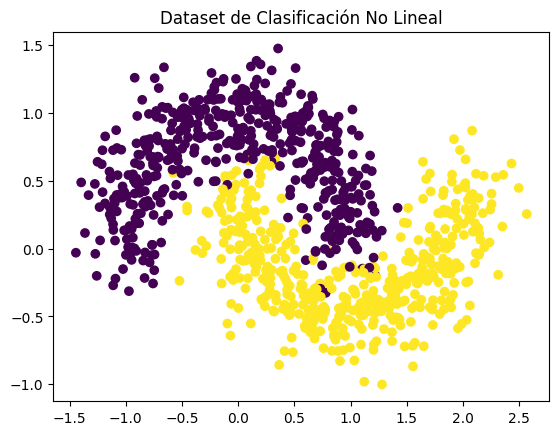

In [7]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Dataset de Clasificación No Lineal")
plt.savefig(r"C:\Users\marco\Downloads\dataset_plot.png")
plt.show()




### **Paso 3: Implementación del MLP con Keras**  


#### **Modelo Secuencial con:**  
- Capa oculta (4 neuronas, activación ReLU).  
- Capa de salida (1 neurona, activación sigmoide).  
- Función de pérdida: `binary_crossentropy` (para clasificación binaria).  
- Optimizador: `Adam` (variante de descenso de gradiente).  


In [3]:


model = Sequential([
    Dense(4, activation='relu', input_shape=(2,), kernel_initializer=RandomUniform(minval=-0.5, maxval=0.5)),
    Dense(1, activation='sigmoid', kernel_initializer=RandomUniform(minval=-0.5, maxval=0.5))
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()



c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


### **Paso 4: Entrenamiento con Retropropagación** 

In [4]:
 

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history 

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5262 - loss: 0.6896 - val_accuracy: 0.4800 - val_loss: 0.6872
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4702 - loss: 0.6858 - val_accuracy: 0.4833 - val_loss: 0.6809
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5331 - loss: 0.6769 - val_accuracy: 0.4933 - val_loss: 0.6745
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5480 - loss: 0.6714 - val_accuracy: 0.6167 - val_loss: 0.6675
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6931 - loss: 0.6609 - val_accuracy: 0.6667 - val_loss: 0.6597
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7512 - loss: 0.6518 - val_accuracy: 0.6900 - val_loss: 0.6506
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7614 - loss: 0.6428 - val_accuracy: 0.7000 - val_loss: 0.6405
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7544 - loss: 0.6312 - val_accuracy: 0.7033 - 


### **Paso 5: Visualización de Resultados**  
#### **Curvas de Aprendizaje:**  


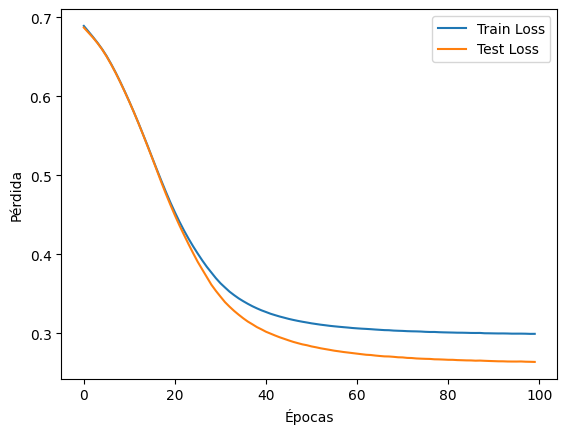

In [6]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.savefig(r"C:\Users\marco\Downloads\loss_plot.png")
plt.show()




#### **Frontera de Decisión:**  


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


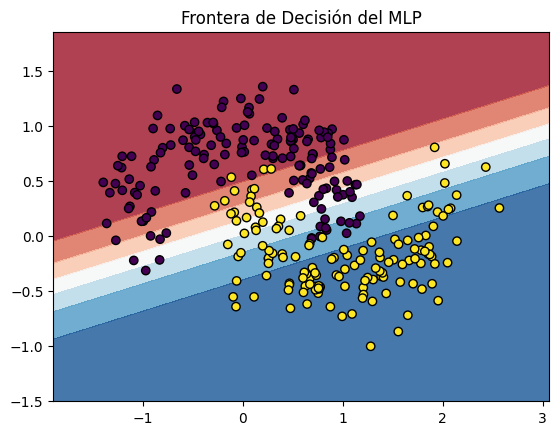

In [10]:

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Crear una malla de puntos
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    # Predecir para cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Dibujar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='RdBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    plt.title("Frontera de Decisión del MLP")
    plt.show()

# Llamar a la función
plot_decision_boundary(model, X_test, y_test)



### **Paso 6: Experimentos Adicionales**  
#### **1. Inicialización de Pesos a Cero (¡Advertencia!)**  


In [11]:

model_zero_init = Sequential([
    Dense(4, activation='relu', input_shape=(2,), kernel_initializer=Zeros()),
    Dense(1, activation='sigmoid', kernel_initializer=Zeros())
])
model_zero_init.compile(optimizer='adam', loss='binary_crossentropy')
model_zero_init.fit(X_train, y_train, epochs=100, verbose=0)
print("Precisión con pesos en cero:", accuracy_score(y_test, model_zero_init.predict(X_test) > 0.5))



c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Precisión con pesos en cero: 0.48



#### **2. Comparación de Funciones de Activación**  


In [12]:

activations = ['relu', 'tanh', 'sigmoid']
for activation in activations:
    model_act = Sequential([
        Dense(4, activation=activation, input_shape=(2,)),
        Dense(1, activation='sigmoid')
    ])
    model_act.compile(optimizer='adam', loss='binary_crossentropy')
    model_act.fit(X_train, y_train, epochs=100, verbose=0)
    print(f"Precisión con {activation}:", accuracy_score(y_test, model_act.predict(X_test) > 0.5))



c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Precisión con relu: 0.8866666666666667


c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Precisión con tanh: 0.8766666666666667


c:\Users\marco\Documentos\investigacion\ml_intro\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Precisión con sigmoid: 0.8433333333333334



---

### **Conclusiones de la Práctica:**  
- **Retropropagación:** El modelo ajusta automáticamente los pesos mediante `model.fit()`.  
- **Funciones de Activación:** ReLU suele ser más eficiente que sigmoide/tanh en capas ocultas.  
- **Inicialización:** Los pesos aleatorios rompen la simetría y permiten el aprendizaje.  
- **Batch y Épocas:** El mini-batch (`batch_size=32`) acelera el entrenamiento.  



**Salida Esperada:**  
- Gráficos de pérdida decreciente.  
- Frontera de decisión no lineal que separa las clases.  
- Precisión > 90% con inicialización adecuada.  

---  



**¿Qué más te gustaría explorar?** Por ejemplo:  
- Añadir más capas ocultas para crear una DNN.  
- Regularización con Dropout.  
- Optimización de hiperparámetros.  



¡Espero que esta práctica te ayude a dominar los MLPs! 